Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.utils import to_categorical
import time
import matplotlib.pyplot as plt


Load and Prepare the MNIST Dataset

In [4]:
print("Loading MNIST dataset...")

# Built-in dataset (auto-downloads if not present)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (LeNet expects 4D input)
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f" Training set: {X_train.shape}, Testing set: {X_test.shape}")


Loading MNIST dataset...
 Training set: (60000, 28, 28), Testing set: (10000, 28, 28)


Build and Train the ANN Model

In [5]:
ann_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\n Training ANN Model...")
start = time.time()
ann_history = ann_model.fit(X_train, y_train_cat,
                            epochs=10, batch_size=128,
                            validation_split=0.1, verbose=2)
ann_time = time.time() - start

# Evaluate ANN
ann_loss, ann_acc = ann_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n ANN Test Accuracy: {ann_acc*100:.2f}%")
print(f" ANN Training Time: {ann_time:.2f} seconds")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



 Training ANN Model...
Epoch 1/10
422/422 - 4s - 9ms/step - accuracy: 0.9033 - loss: 0.3413 - val_accuracy: 0.9618 - val_loss: 0.1364
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9586 - loss: 0.1416 - val_accuracy: 0.9675 - val_loss: 0.1195
Epoch 3/10
422/422 - 3s - 6ms/step - accuracy: 0.9702 - loss: 0.0989 - val_accuracy: 0.9718 - val_loss: 0.0981
Epoch 4/10
422/422 - 5s - 11ms/step - accuracy: 0.9779 - loss: 0.0736 - val_accuracy: 0.9767 - val_loss: 0.0815
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9817 - loss: 0.0583 - val_accuracy: 0.9767 - val_loss: 0.0833
Epoch 6/10
422/422 - 2s - 5ms/step - accuracy: 0.9861 - loss: 0.0452 - val_accuracy: 0.9785 - val_loss: 0.0821
Epoch 7/10
422/422 - 2s - 5ms/step - accuracy: 0.9885 - loss: 0.0386 - val_accuracy: 0.9797 - val_loss: 0.0812
Epoch 8/10
422/422 - 4s - 10ms/step - accuracy: 0.9909 - loss: 0.0306 - val_accuracy: 0.9793 - val_loss: 0.0809
Epoch 9/10
422/422 - 2s - 6ms/step - accuracy: 0.9926 - loss: 0.0242 - val_accuracy: 0

Build and Train the LeNet-5 CNN

In [ ]:
lenet = Sequential([
    Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1), padding='same'),
    AveragePooling2D(pool_size=(2,2)),
    Conv2D(16, kernel_size=(5,5), activation='tanh'),
    AveragePooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

lenet.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

print("\n Training LeNet-5 CNN Model...")
start = time.time()
lenet_history = lenet.fit(X_train_cnn, y_train_cat,
                          epochs=10, batch_size=128,
                          validation_split=0.1, verbose=2)
lenet_time = time.time() - start

# Evaluate LeNet-5
lenet_loss, lenet_acc = lenet.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"\n LeNet-5 Test Accuracy: {lenet_acc*100:.2f}%")
print(f" LeNet-5 Training Time: {lenet_time:.2f} seconds")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 Training LeNet-5 CNN Model...
Epoch 1/10
422/422 - 34s - 81ms/step - accuracy: 0.8960 - loss: 0.3559 - val_accuracy: 0.9618 - val_loss: 0.1345
Epoch 2/10
422/422 - 33s - 79ms/step - accuracy: 0.9596 - loss: 0.1302 - val_accuracy: 0.9750 - val_loss: 0.0841
Epoch 3/10
422/422 - 41s - 96ms/step - accuracy: 0.9746 - loss: 0.0838 - val_accuracy: 0.9770 - val_loss: 0.0745
Epoch 4/10
422/422 - 39s - 93ms/step - accuracy: 0.9799 - loss: 0.0642 - val_accuracy: 0.9820 - val_loss: 0.0605
Epoch 5/10
422/422 - 42s - 99ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.9832 - val_loss: 0.0600
Epoch 6/10
422/422 - 31s - 72ms/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.9850 - val_loss: 0.0501
Epoch 7/10
422/422 - 42s - 100ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9848 - val_loss: 0.0487
Epoch 8/10
422/422 - 30s - 72ms/step - accuracy: 0.9909 - loss: 0.0286 - val_accuracy: 0.9885 - val_loss: 0.0469
Epoch 9/10
422/422 - 42s - 100ms/step - accuracy: 0.9922 - loss

Compare Performance



In [8]:
print("\n Model Comparison:")
print(f"{'Model':<15}{'Accuracy':<15}{'Training Time (s)':<20}")
print(f"{'-'*50}")
print(f"{'ANN':<15}{ann_acc*100:<15.2f}{ann_time:<20.2f}")
print(f"{'LeNet-5':<15}{lenet_acc*100:<15.2f}{lenet_time:<20.2f}")



 Model Comparison:
Model          Accuracy       Training Time (s)   
--------------------------------------------------
ANN            97.60          29.33               
LeNet-5        98.50          375.75              


Plot Validation Accuracy

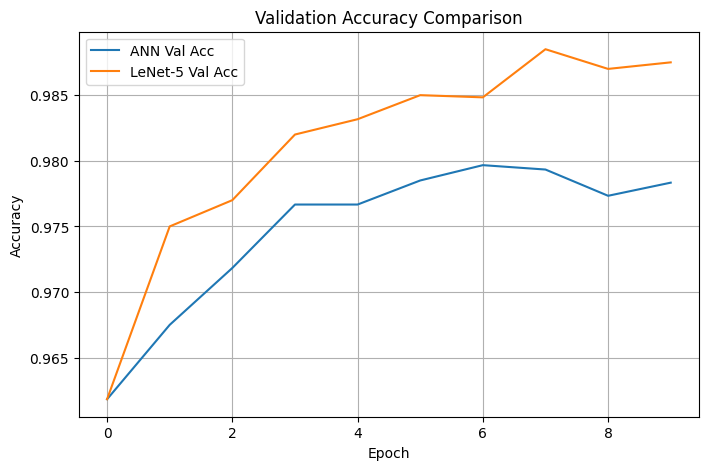

In [9]:
plt.figure(figsize=(8,5))
plt.plot(ann_history.history['val_accuracy'], label='ANN Val Acc')
plt.plot(lenet_history.history['val_accuracy'], label='LeNet-5 Val Acc')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
